In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [46]:
def plot_double(title, interpolation_val, interpolation_final, key, best_val):
    val = interpolation_val[['freq', key]]
    val['label'] = 'valid on {}'.format(key)
    final = interpolation_final[['freq', key]]
    final['label'] = 'final on {}'.format(key)
    fatality = pd.concat([val, final])
    plt.figure()
    graph = sns.lineplot(x="freq", y=key, hue='label', data=fatality)
    if key == "valid":
        graph.axhline(linewidth=0.5, y=best_val, color='black')
    graph.set_title(title, fontsize=16)
    plt.ylabel("accuracy")
    

In [47]:
def plot_single(interpolation, key, mode, best_val):
    fatality = interpolation[['freq', key]]
    label = "{} on {}".format(mode, key)
    plt.figure()
    graph = sns.lineplot(x="freq", y=key, label=label, data=fatality)
    graph.axhline(linewidth=0.5, y=best_val, color='black')
    plt.ylabel("accuracy")
    plt.savefig('{}_{}.png'.format(mode, key))

In [48]:
def plot_ul(title, interpolation, key, best_val):
    plt.figure()
    graph = sns.lineplot(x="freq", y=key, hue="layer", data=interpolation)
    if key == "valid":
        graph.axhline(linewidth=0.7, y=best_val, color="black")
    graph.set_title("{}_{}".format(title,key), fontsize=16)
    plt.ylabel("accuracy")

In [49]:
def get_combined_plots(title, interpolation_val, interpolation_final, best_val):
    for key in ['train', 'valid']:
        plot_double(title, interpolation_val, interpolation_final, key, best_val)

In [50]:
def get_single_plot(interpolation_df, mode, best_val):
    for key in ['valid']:
        plot_single(interpolation_df, key, mode, best_val)

In [51]:
def get_combined_plots_from_path(title, path_val, path_final, best_val):
    interpolation_val = pd.read_csv(path_val)
    interpolation_final = pd.read_csv(path_final)
    get_combined_plots(title, interpolation_val, interpolation_final, best_val)

In [52]:
def get_plot_AB_from_path(path, num_steps, best_val):
    temp_df = pd.read_csv(path)
    print(temp_df)
    for step in range(1, num_steps+1):
        f = 0.1*step
        current_df = temp_df.loc[lambda df: df['freq1'] == f, ['freq2', 'valid']]
        current_df = current_df.rename({'freq2': 'freq'}, axis=1)
        get_single_plot(current_df, "{:.1f}A -> {:.1f}B".format(f, f), best_val)

In [53]:
def get_plot_ul(path, best_val):
    temp_df = pd.read_csv(path)
    for key in ["train", "valid"]:
        plot_ul("Upper Layers", temp_df, key, best_val)

    Unnamed: 0  freq1  freq2   valid
0            0    0.1    0.1  0.8320
1            1    0.1    0.2  0.8358
2            2    0.1    0.3  0.8366
3            3    0.1    0.4  0.8355
4            4    0.1    0.5  0.8370
5            5    0.1    0.6  0.8401
6            6    0.1    0.7  0.8401
7            7    0.1    0.8  0.8461
8            8    0.1    0.9  0.8426
9            9    0.1    1.0  0.8484
10          10    0.2    0.1  0.8338
11          11    0.2    0.2  0.8355
12          12    0.2    0.3  0.8391
13          13    0.2    0.4  0.8411
14          14    0.2    0.5  0.8439
15          15    0.2    0.6  0.8477
16          16    0.2    0.7  0.8478
17          17    0.2    0.8  0.8537
18          18    0.2    0.9  0.8545
19          19    0.2    1.0  0.8556
20          20    0.3    0.1  0.8333
21          21    0.3    0.2  0.8403
22          22    0.3    0.3  0.8449
23          23    0.3    0.4  0.8457
24          24    0.3    0.5  0.8511
25          25    0.3    0.6  0.8568
2

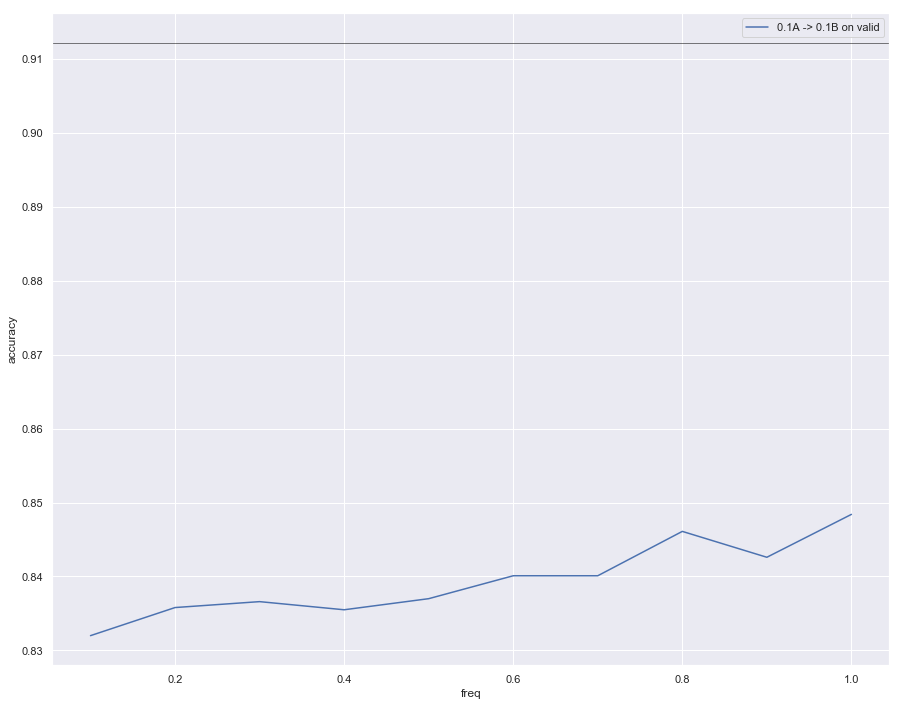

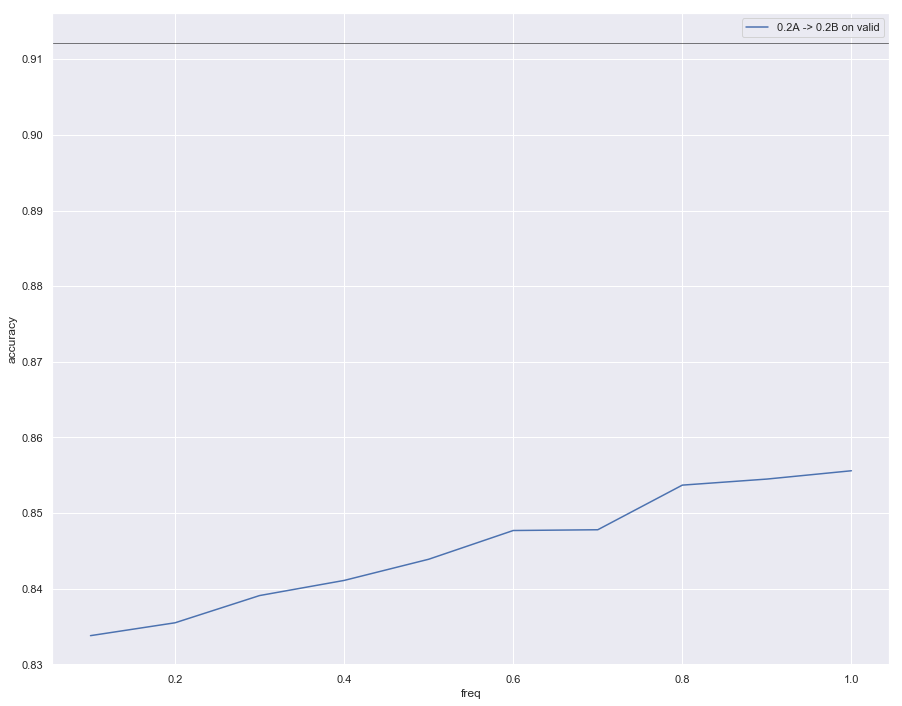

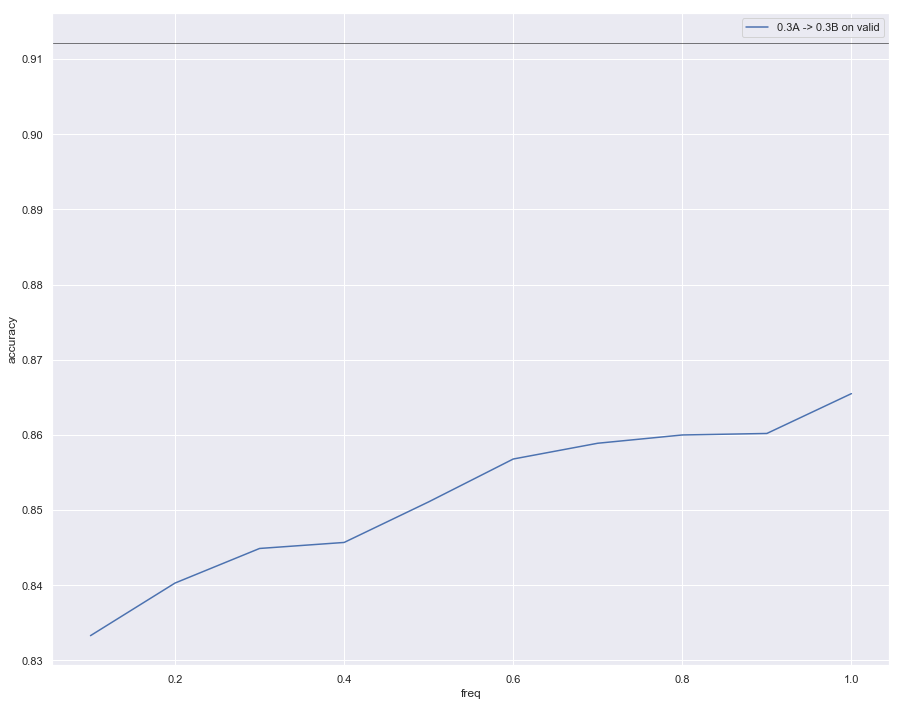

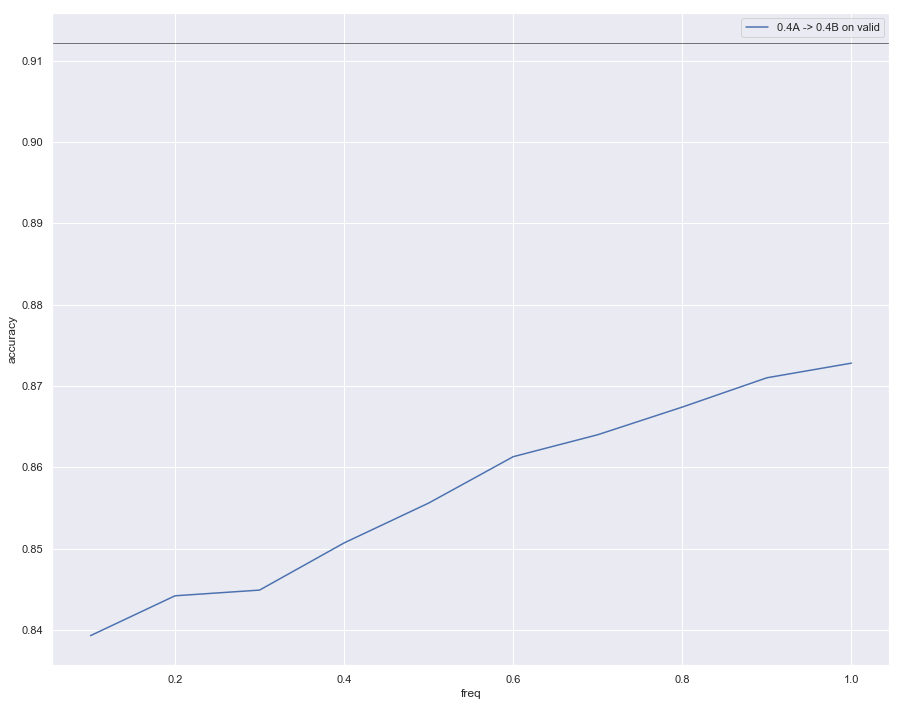

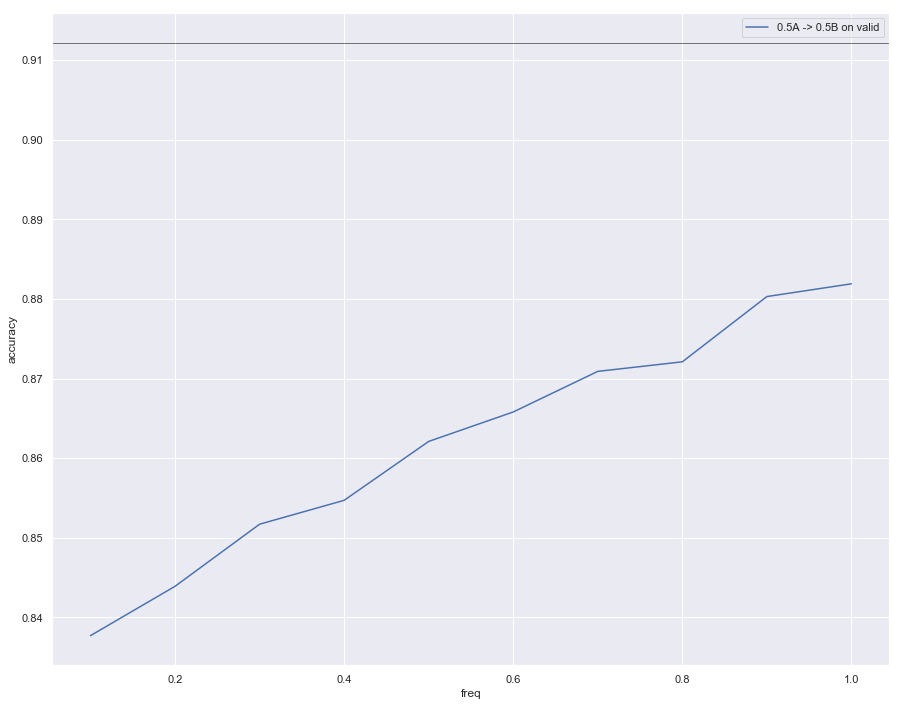

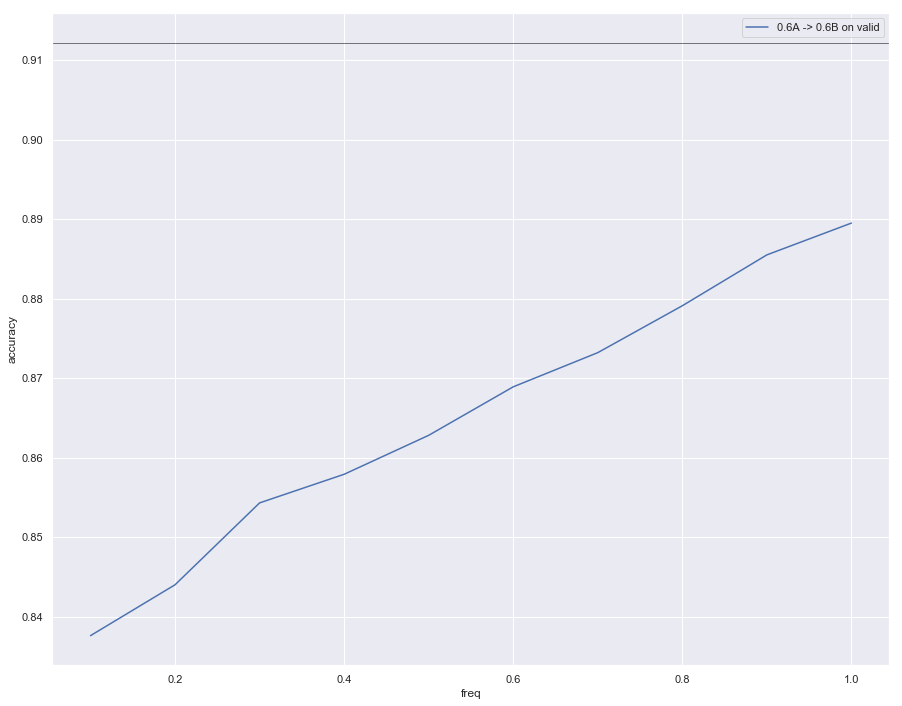

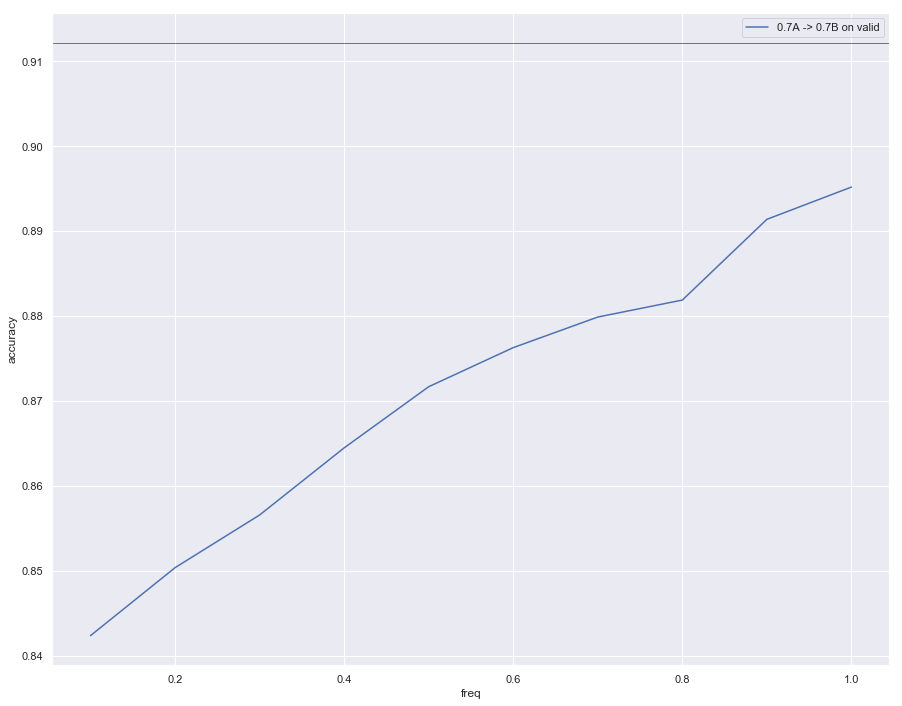

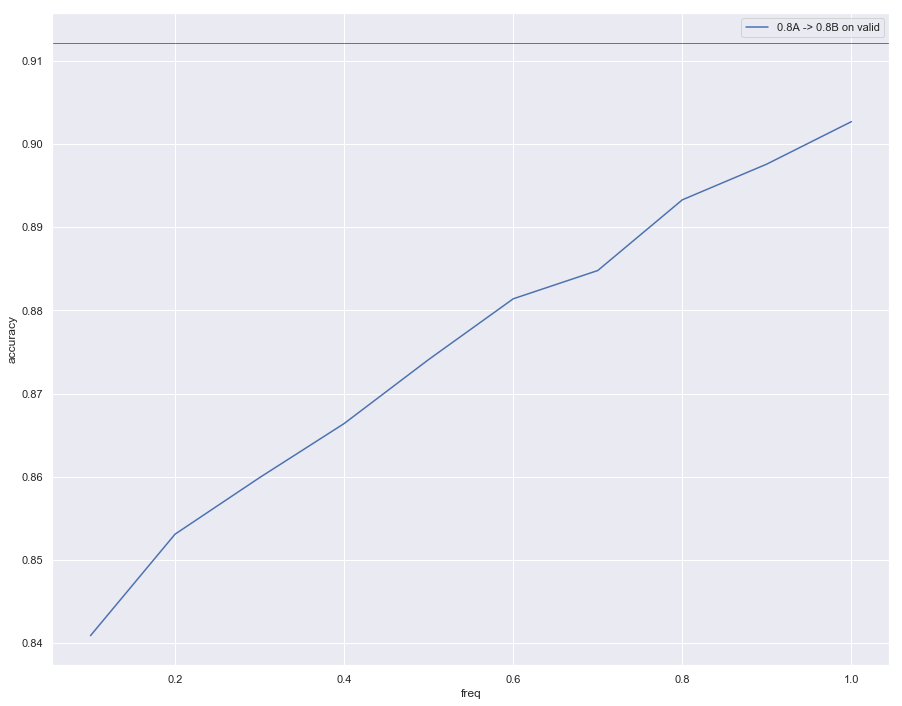

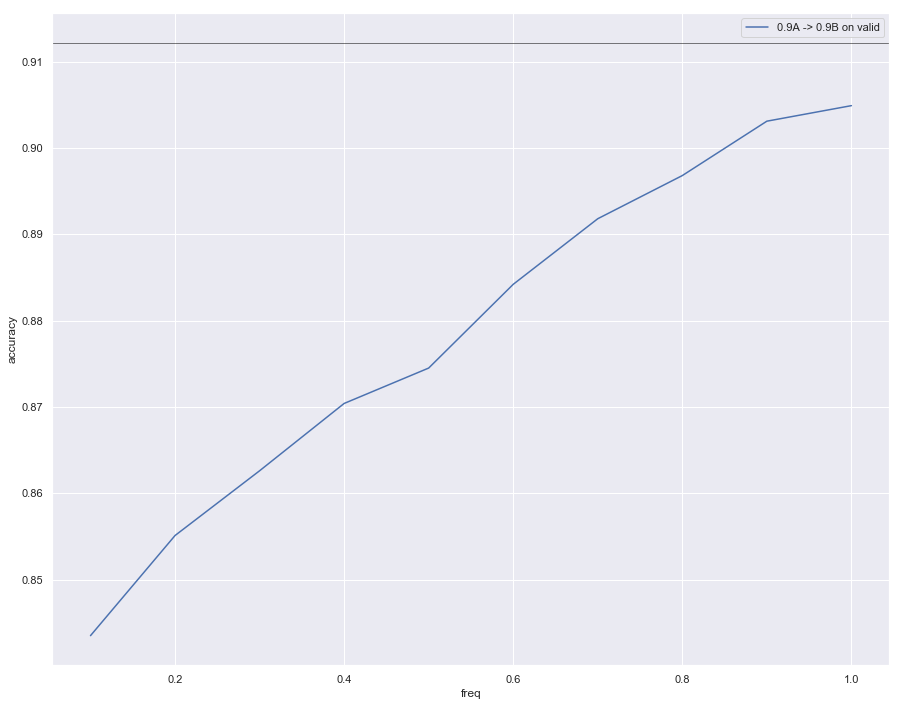

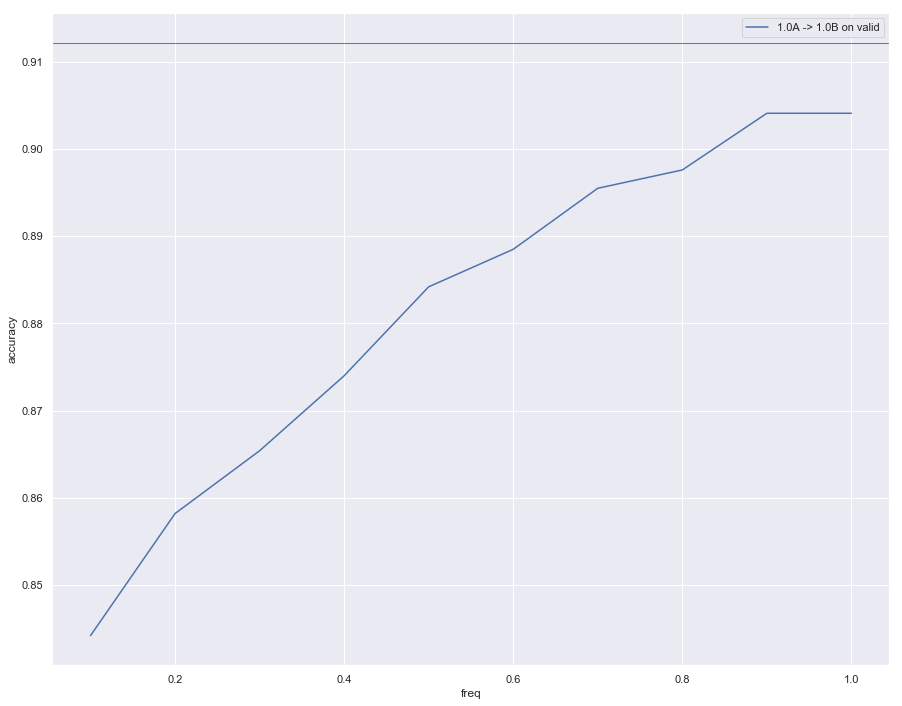

In [55]:
# to set up
path = '../warm_start'
BEST_VALID_SCORE = 0.912200
TITLE = "Short(50 epoch) - random_labels"
NUM_STEPS = 10

sns.set(rc={'figure.figsize':(15,12)})
# path_valid = os.path.join(path, 'interpolation_val.csv')
# path_final = os.path.join(path, 'interpolation_final.csv')
# path_ul = os.path.join(path, 'interpolation_ul_conv.csv')

# path_interpolation = os.path.join(path, 'interpolation_warm_start.csv')
# get_single_plot(path_interpolation, "valid", BEST_VALID_SCORE)

path_interpolation = os.path.join(path, 'step_interpolation_warm_start.csv')
get_plot_AB_from_path(path_interpolation, NUM_STEPS, BEST_VALID_SCORE)

# get_plot_ul(path_ul, BEST_VALID_SCORE)
# get_single_plot(pd.read_csv(os.path.join(path, 'interpolation_AB_last.csv')), "1.0A -> 1.0B", BEST_VALID_SCORE)
# path_interpolation_AB = os.path.join(path, 'interpolation_AB.csv')

# get_plot_AB_from_path(path_interpolation_AB, NUM_STEPS, BEST_VALID_SCORE)
# get_single_plot(path_valid, "valid", BEST_VALID_SCORE)
# get_single_plot(path_final, "final")

# get_combined_plots_from_path(TITLE, path_valid, path_final, BEST_VALID_SCORE)


### 